# Lab 3 - Matrix structure for discrete-time models
### Name: Keegan Ballantyne
### Lab section: Thursday

In [2]:
#Necessary imports
import numpy as np #package for work with arrays and matrices -- this week including some linear algebra
import matplotlib.pyplot as plt #package with plotting capabilities

## Introduction

In this lab we will use tools from linear algebra to investigate higher dimensional difference equations.

The objectives for this assignment are:
 - Assign matrix variables
 - Propagate a population vector through time using matrix multiplication
 - Use slices and sums on arrays
 - Calculate eigenvalues and eigenvectors of a matrix
 - Interpret their meaning for the dynamics of population models

## Part 1: Fibonacci and the leading eigenvalue
 
The Fibonacci sequence is defined by the equation:
 
$$ N(t+1) = N(t) + N(t-1) $$
 
with the initial values $N(0)=1$ and $N(1)=1$. The Fibonacci sequence is 
ubiquitous in many areas of science. It describes the number of spirals 
on a sunflower as well as the recursive solution to the Towers of Hanoi 
problem (the game where you have to move rings between three pegs).

### Q1.1
Based on the recursive definition above, construct a for loop that iterates through 10 timesteps, given 2 initial values (for a total of 12 timesteps). Compute and plot the ratios of succesive generations N(i+1)/N(i). What value does the graph approach? What is the name of this value?  What prediction can you make about the long term dynamics of the system? 

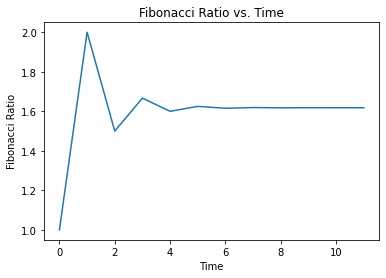

In [3]:
time = 12 # number of timesteps

N = np.zeros(time+2) # initializes empty population vector with zeroes and adds two to account for first two initial
                        #values
N_rat = np.zeros(time+2) # initializes empty population ratio vector with zeroes and adds two to account for first two
                        # initial values
N[0] = 1
N[1] = 1

t = np.arange(time+2) # initialize time array

for i in range(time):
    N[i+2] = N[i]+N[i+1] # model of Fib sequence
    N_rat[i] = N[i+1]/N[i]

# print(N)
# print(N_rat)

plt.plot(t[:time], N_rat[:time])
plt.xlabel('Time')
plt.ylabel('Fibonacci Ratio')
plt.title('Fibonacci Ratio vs. Time')
plt.show()

As t increases the value of the ratio in this graph approaches is ~1.6. The name of this ratio is known as the Golden Ratio which means that the ratio of two quantities are equal to the ratio of their sum to the larger of the two quantities. The long term dynamics of this system as time goes on will have each new value move more towards the Golden Ratio at that fixed point.

### Q1.2
In class we saw that we could rewrite the second order Fibonacci difference equation as two coupled first order difference equations. Write a code that generates the first 12 terms of the Fibonacci sequence by using matrix multiplication inside the for loop, starting with  the initial population vector (1,1), representing juvenile and adult rabbit populations. Your code should produce an array of size 2 by 12 (a 2-row  column vector for each time). Print out this array, and check that you get the same result as in Chapter 5 of the textbook. Calculate the fraction of total population at each time which are juveniles (non-reproducing rabbits) and adults, and plot those fractions over time. How do they correspond to the calculations in Q1.1?

[[5.0000e+02 5.2000e+02 1.0200e+03 1.5400e+03 2.5600e+03 4.1000e+03
  6.6600e+03 1.0760e+04 1.7420e+04 2.8180e+04 4.5600e+04 7.3780e+04
  1.1938e+05]
 [2.0000e+01 5.0000e+02 5.2000e+02 1.0200e+03 1.5400e+03 2.5600e+03
  4.1000e+03 6.6600e+03 1.0760e+04 1.7420e+04 2.8180e+04 4.5600e+04
  7.3780e+04]]


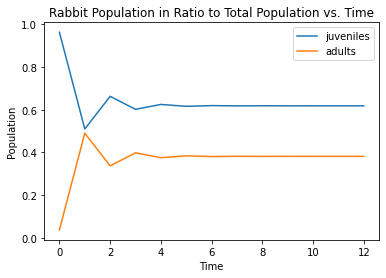

In [6]:
time = 12 # number of timesteps

N = np.zeros(time+2) # initializes empty population vector with zeroes and adds two to account for first two initial
                        #values
N_rat = np.zeros(time+2) # initializes empty population ratio vector with zeroes and adds two to account for first two
                        # initial values
N[0] = 1
N[1] = 1

# t = np.arange(time+2) # initialize time array

# print(N)
# print(N_rat)

L=np.array([[1, 1], 
            [1, 0]]) # define Leslie matrix with initial values

pop = np.zeros([2, time+1]) # define population column vector

pop[:,0] = np.array([500,20])

for i in np.arange(time):
    pop[:,i+1] = L@pop[:,i] #propagate the population vector for one step

print(pop)
    
plt.plot(pop[0,:]/np.sum(pop, axis = 0), label = 'juveniles')
plt.plot(pop[1,:]/np.sum(pop, axis = 0), label = 'adults')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Rabbit Population in Ratio to Total Population vs. Time')
plt.legend()
plt.show()

They correspond with the calculations from Question 1.1 from the way they both of their ratios move towards a fixed point as time increases. This fixed point behavior happens to both juvenile and adult rabbits within the population as juveniles approach a fixed point of ~0.6 and adults approach a fixed point of ~0.4. 

## Part 2: Leslie and Usher models

Recall that a Leslie matrix defines a discrete-time population growth model that is used in ecology. Each Leslie matrix has an associated variable vector that stores the present values of certain distinct groups (usually age groups).

Flour beetles live in and eat flour (surpise!). As with many insects, they go through distinct life stages of eggs, larvae, pupae, and adults. Let us simplify the situation and keep track only of the larvae and adults, with the following parameters: adults lay 80 eggs per individual and that 0.1 of the eggs hatch to become larvae, and that 0.12 of the larvae survive to become adults, and the adults reproduce and die. The reality is considerably messier, but we will ignore these effects in this assignment.

### Q2.1
Define the the Leslie matrix for the above stated situation. Start the population with 100 larvae and 10 adults and iterate the model for 100 steps using matrix multiplication and plot the  total population (including eggs for the purposes of this exercise) versus time (for each time step) on one figure. On a different figure, plot the two individual age group populations against time (for each time step).  Describe what happens over time. 

[[0.   8.  ]
 [0.12 0.  ]]


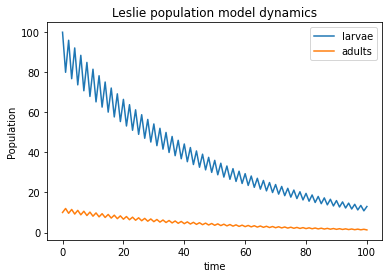

In [14]:
L=np.array([[0, 8], 
            [0.12, 0]]) # define Leslie matrix
print(L)

time = 100 #number of time steps

pop = np.zeros([2, time+1]) # define population column vector


pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults

for i in np.arange(time):
    pop[:,i+1] = L@pop[:,i] #propagate the population vector for one step
    
# print(pop)


plt.plot(pop[0,:],label='larvae') # slices and plots the larvae
plt.plot(pop[1,:],label='adults') # slices and plots the adults

plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

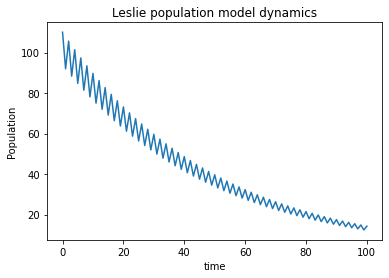

In [12]:
plt.plot(np.sum(pop, axis = 0)) # slices and plots the larvae

plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model dynamics')
# plt.legend()
plt.show()

For both the total population and for each age group, there is a oscillitory behavior within the plot. Both plots also decay and have a trend towards 0 after 100 time steps.

### Q2.2

Now suppose that 0.25 of the adults survive to reproduce again (and potentially again and again!) 

We can now extend the previous Leslie matrix into an Usher matrix, which allows individuals to remain within the same age group from time step to time step. Define the Usher matrix and iterate the model, starting with the same initial population: 100 larvae and 10 adults. Plot the total population versus time on one figure. On a different figure, plot the individual age group populations against time. Describe what happens over time.

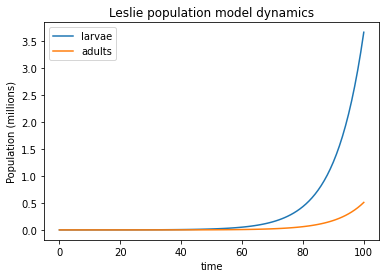

In [27]:
U=np.array([[0, 8], 
            [0.12, 0.25]]) # define Leslie matrix
# print(U)

time = 100 #number of time steps

pop = np.zeros([2, time+1]) # define population column vector


pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults

for i in range(time):
    pop[:,i+1] = U@pop[:,i] #propagate the population vector for one step
    
# print(pop)

plt.plot(pop[0,:]/1000000,label='larvae') # slices and plots the larvae
plt.plot(pop[1,:]/1000000,label='adults') # slices and plots the adults

plt.xlabel('time')
plt.ylabel('Population (millions)')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

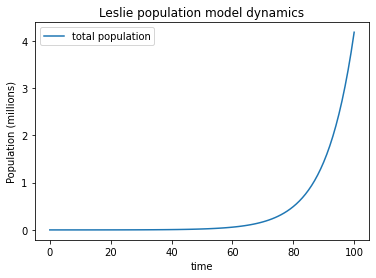

In [26]:
plt.plot((pop[0,:]+pop[1,:])/1000000,label='total population')

plt.xlabel('time')
plt.ylabel('Population (millions)')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

For both plots the populations increase towards infinity, which happens for the total population, adults, and larvae. This is a representation of exponential growth.

### Q2.3
Investigate the age distributions in the flour beetle populations in each of the above models. Plot the population fraction in each stage (larvae and adults) by dividing each number by the total population at the time step. Do this for each model above and make a different figure for each model. Describe what happens to the age distributions over time.

[[0.   8.  ]
 [0.12 0.  ]]


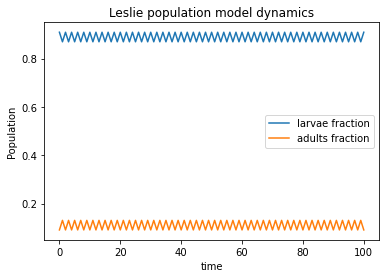

In [16]:
L=np.array([[0, 8], 
            [0.12, 0]]) # define Leslie matrix
print(L)

time = 100 #number of time steps

pop = np.zeros([2, time+1]) # define population column vector


pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults

for i in np.arange(time):
    pop[:,i+1] = L@pop[:,i] #propagate the population vector for one step
    
# print(pop)


plt.plot(pop[0,:]/np.sum(pop, axis = 0),label='larvae fraction') # slices and plots the larvae
plt.plot(pop[1,:]/np.sum(pop, axis = 0),label='adults fraction') # slices and plots the adults

plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

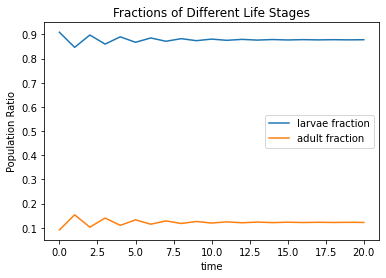

In [17]:
U=np.array([[0, 8], 
            [0.12, 0.25]]) # define Leslie matrix
# print(U)

time = 20 #number of time steps

pop = np.zeros([2, time+1]) # define population column vector

pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults

for i in range(time):
    pop[:,i+1] = U@pop[:,i] #propagate the population vector for one step
    
# print(pop)

# plt.plot(pop[0,:],label='larvae') # slices and plots the larvae
# plt.plot(pop[1,:],label='adults') # slices and plots the adults

# plt.xlabel('time')
# plt.ylabel('Population (millions)')
# plt.title('Usher Population Model Dynamics')
# plt.legend()
# plt.show()

plt.plot(pop[0,:]/np.sum(pop, axis = 0), label = 'larvae fraction')
plt.plot(pop[1,:]/np.sum(pop, axis = 0), label = 'adult fraction')        
plt.xlabel('time')
plt.ylabel('Population Ratio')
plt.title('Fractions of Different Life Stages')
plt.legend()
plt.show()

In the Leslie model, the fraction of the age group with the total population oscillates, but the plots overall show that the fraction of the larvae is around 0.9 and the fraction of the adults is around 0.1. Both of these fractions remain the same throughout the time steps, with the exception of the oscillation.

In the Usher model, the fraction of the age group with the total population oscillates a little bit more dramatically compared to the Leslie model when t < 5. When t > 5 the oscillation becomes very little and almost non-existent as t increase. Similarly, the fraction of the larvae is around 0.9 and the fraction of the adults is around 0.1. Both fractions remain the same throughout the time steps when t > 5.

## Part 3: Matrix analysis of age-structured populations

The special numbers called eigenvalues and the special vectors called eigenvectors describe the dynamics and the distribution of populations, respectively. Use the numpy function np.linalg.eig() to calculate them.

### Q3.1
Compute the eigenvalues and eigenvectors of the Leslie model in Q2.1. Use them to predict the dynamics of the models - what happens to the total population over the long term? Predict the long-term population distribution and compare it with the first figure you generated in Q2.3.

In [18]:
L = np.array([[0, 8], 
              [0.12, 0]])

print(L)

eVals, eVecs = np.linalg.eig(L)

print('Eigenvalues: '+str(eVals))
print('Eigenvectors: '+str(eVecs))
print('The long term fractions of larvae and adults are: '+str(eVecs[:,0]/np.sum(eVecs[:,0])))

[[0.   8.  ]
 [0.12 0.  ]]
Eigenvalues: [ 0.9797959 -0.9797959]
Eigenvectors: [[ 0.99258333 -0.99258333]
 [ 0.12156613  0.12156613]]
The long term fractions of larvae and adults are: [0.89088885 0.10911115]


The total population's long term distribution will show that the total population will continue to decay over time. The long term fractional values mirror the visual graph that was shown in 2.3 by being about 0.9 for larvae and about 0.1 for adults.

### Q3.2
Find the eigenvalues and eigenvector of the Usher model in Q2.2. Use them to predict the dynamics of the models - what happens to the total population over the long term? Predict the long-term population distribution and compare it with the second figure you generated in Q2.3.

In [20]:
U = np.array([[0, 8], 
              [0.12, 0.25]])

print(U)

eVals, eVecs = np.linalg.eig(U)

print('Eigenvalues: '+str(eVals))
print('Eigenvectors: '+str(eVecs))
print('The long term fractions of larvae and adults are: '+str(eVecs[:,0]/np.sum(eVecs[:,0])))

[[0.   8.  ]
 [0.12 0.25]]
Eigenvalues: [-0.86273731  1.11273731]
Eigenvectors: [[-0.99423527 -0.99046482]
 [ 0.10722048 -0.1377659 ]]
The long term fractions of larvae and adults are: [ 1.1208779 -0.1208779]


The total population's long term distribution will show that the total population will continue to have growth over time. The long term fractional values mirror the visual graph that was shown in 2.3 by being about 0.9 for larvae and about 0.1 for adults.

### Q 3.3
Calculate or find the special value of the adult survival rate $s$ in the Usher model at which the solutions neither decay to zero nor grow exponentially to infinity, in other words, that have a leading eigenvalue of 1. Calculate the eigenvalues and eigenvectors and predict the steady-state age distribution of this model.

In [32]:
U = np.array([[0, 8], 
              [0.12, 0.04]])

print(U)

eVals, eVecs = np.linalg.eig(U)

print('Eigenvalues: '+str(eVals))
print('Eigenvectors: '+str(eVecs))
print('The long term fractions of juveniles and adults are: '+str(eVecs[:,0]/np.sum(eVecs[:,0])))

[[0.   8.  ]
 [0.12 0.04]]
Eigenvalues: [-0.96  1.  ]
Eigenvectors: [[-0.99287684 -0.99227788]
 [ 0.11914522 -0.12403473]]
The long term fractions of juveniles and adults are: [ 1.13636364 -0.13636364]
